In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# from scratch

In [2]:
# creating a random distribution of numbers(sample data)
def create_number(mu=54,sigma=15,seed=44,samples=100):

    np.random.seed(seed)
    sample_numer = np.random.normal(mu,sigma,samples) #to create_normal distribution
    sample_number = np.round(sample_numer,10)

    return sample_number

In [3]:
sample = create_number()
sample

array([42.74077924, 73.74535987, 72.69210043, 29.92626388, 31.97784482,
       28.27394313, 81.88175537, 55.31381964, 53.21516705, 62.33207455,
       39.54894459, 51.29517802, 36.24886266, 63.08168881, 39.7252417 ,
       59.4128409 , 69.90915384, 52.24271732, 66.38497276, 35.85279672,
       36.14244576, 57.29807732, 50.80621305, 32.82751285, 46.75528477,
       72.02643124, 43.41295451, 54.37772032, 48.13307768, 56.89708685,
       59.23936398, 62.86782573, 61.80614805, 66.37833584, 60.39305261,
       56.93460039, 46.28831733,  7.89466777, 48.07261394, 42.06901224,
       43.45197733, 27.93910984, 65.26212387, 26.04070283, 60.27766477,
       50.46999244, 60.48160761, 67.05437896, 84.1293328 , 74.57656362,
       69.8789683 , 75.68006346, 54.73234936, 55.3549428 , 46.79614781,
       58.50994103, 70.69469742, 53.71027431, 53.98788602, 44.4220465 ,
       77.92025048, 54.2791948 , 62.42113005, 51.02284767, 60.94811328,
       26.71359028, 55.99387229, 44.74380543, 73.62269256, 65.63

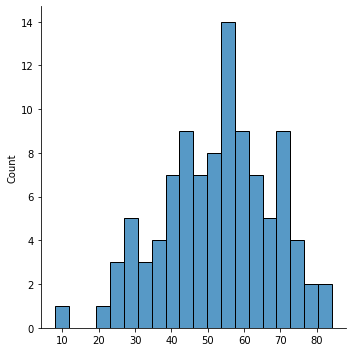

In [4]:
sns.displot(sample,bins=20)

C:\Users\yoke pc\anaconda3\envs\yoke01\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

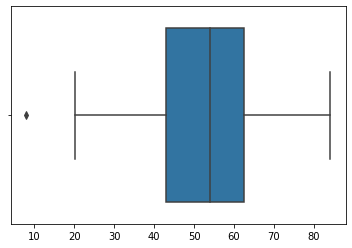

In [5]:
sns.boxplot(sample)

In [6]:
ser = pd.Series(sample)
ser

0     42.740779
1     73.745360
2     72.692100
3     29.926264
4     31.977845
        ...    
95    58.217767
96    62.979685
97    69.407615
98    54.104130
99    27.700354
Length: 100, dtype: float64

In [7]:
ser.describe()

count    100.000000
mean      52.654405
std       15.107741
min        7.894668
25%       43.040896
50%       54.046008
75%       62.535927
max       84.129333
dtype: float64

In [8]:
# to find the lower limit and upper limit we can calucalte by Iqr
IQR = 62.535927 - 43.040896 # 75% - 25% of the
IQR

19.495031000000004

In [9]:
lower_limit = 43.040896 - (1.5*IQR) # 25% - 1.5*Iqr
lower_limit

13.79834949999999

In [10]:
upper_limit = 62.535927 + (1.5*IQR)
upper_limit 

91.7784735

In [11]:
# another method other than pandas we can do with numpy aslo
q25,q75 = np.percentile(sample,[25,75])
IQR = q75 - q25
IQR

19.49503112715

In [12]:
# from the box plot we can identify the outliers is present below the lowerlimit so we can remove the outiler by
a = ser[ser> lower_limit]
a

0     42.740779
1     73.745360
2     72.692100
3     29.926264
4     31.977845
        ...    
95    58.217767
96    62.979685
97    69.407615
98    54.104130
99    27.700354
Length: 99, dtype: float64

In [13]:
len(a) # therefore one oulier is removed

99

# Working in the realworld Data sets

In [14]:
pd.set_option('display.max_rows',None)

In [15]:
df = pd.read_csv(r'D:\ml_ineuron\modular\Ml_class_ineuron\data\Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
df.corr()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


In [17]:
#so it soo big lets check only relation between the dependent and independent only
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

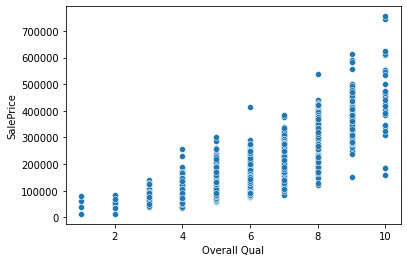

In [18]:
#from the corr we can say the Overall Qual is strongly positive correlated wiith sale price.
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

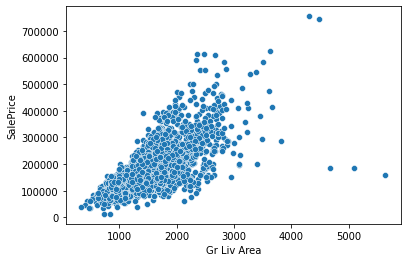

In [19]:
# as the overall qual increae sale price aslo increase
# but from the chart we can identify that there are 3 outliers above 8 which is increased
# lets check with another higly corr feature 
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)


In [20]:
# we conclude that after 4000 that 3 points didnt increase
# lets find the id of the points to remove them
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [21]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [22]:
drp_ind = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 400000)].index

In [23]:
df = df.drop(drp_ind,axis=0)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

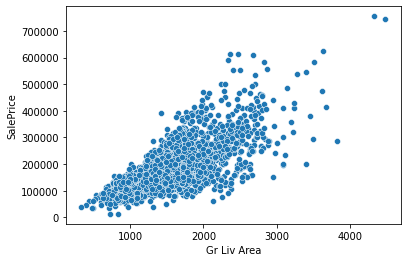

In [24]:
#we drop the three outliers rows lets check now
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [26]:
#pid is unneccory lets drop that
df = df.drop('PID',axis=1)

In [27]:
df.isnull().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2729
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical      

In [28]:
#lets convert the missing info into percentiles 
def percent_missing(df):
    nan_per = (df.isnull().sum()/len(df))*100
    percent_miss = nan_per[nan_per>0].sort_values()

    return percent_miss

In [29]:
percent_miss = percent_missing(df)
percent_miss

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

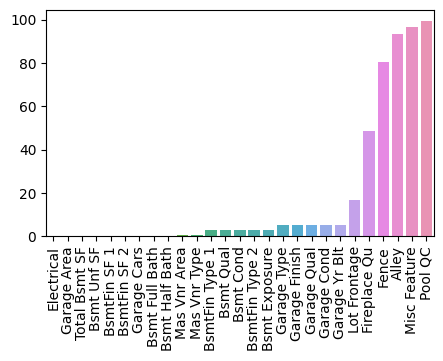

In [30]:
plt.figure(figsize=(5,3),dpi=100)
sns.barplot(y=percent_miss,x= percent_miss.index)
plt.xticks(rotation=90)

(0.0, 1.0)

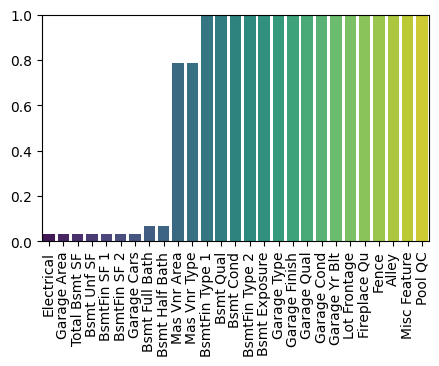

In [31]:
plt.figure(figsize=(5,3), dpi=100)
sns.barplot(x=percent_miss.index, y= percent_miss, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0,1) #for visulaizing 1% data

In [32]:
# dropping the row of feature which is 1 percent of missing values 
percent_miss[percent_miss< 1.0]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [33]:
percent_miss[percent_miss > 1.0]

BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

In [34]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [35]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [36]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [37]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Cars','Total Bsmt SF'])

In [38]:
percent_nan = percent_missing(df)

(0.0, 1.0)

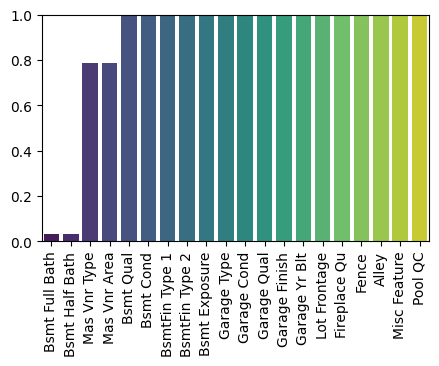

In [39]:
plt.figure(figsize=(5,3), dpi=100)
sns.barplot(x=percent_nan.index, y= percent_nan, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0,1) #for visulaizing 1% data

In [40]:
# BSMT Numeric Columns - fillna "0"
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0) #0 Imputation

#BSMT Ctegorical Columns - fill "None"
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None') #None Imputation

In [41]:
percent_nan = percent_missing(df)

(0.0, 1.0)

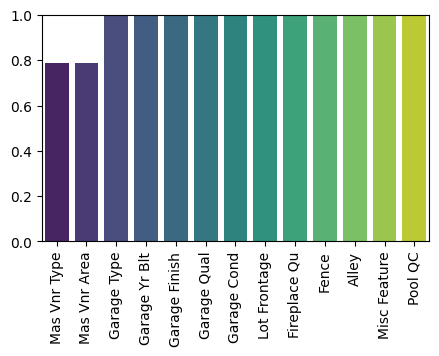

In [42]:
plt.figure(figsize=(5,3), dpi=100)
sns.barplot(x=percent_nan.index, y= percent_nan, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0,1) #for visulaizing 1% data

In [43]:
df['Mas Vnr Area'].isnull().sum()


23

In [44]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None") #categorical feature
df["Mas Vnr Area"] = df['Mas Vnr Area'].fillna("0") #numerical feature

In [45]:
percent_nan = percent_missing(df)
percent_nan

Garage Type       5.369357
Garage Yr Blt     5.403557
Garage Finish     5.403557
Garage Qual       5.403557
Garage Cond       5.403557
Lot Frontage     16.757866
Fireplace Qu     48.529412
Fence            80.506156
Alley            93.228454
Misc Feature     96.409029
Pool QC          99.589603
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

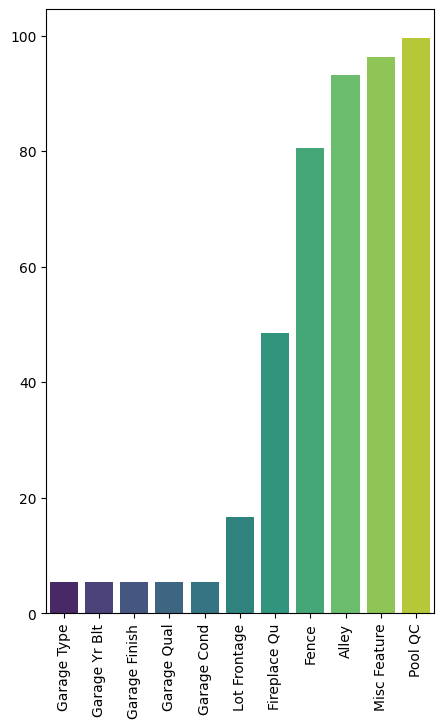

In [46]:
plt.figure(figsize=(5,8),dpi=100)
sns.barplot(x=percent_nan.index,y = percent_nan, palette= 'viridis')
plt.xticks(rotation=90)


In [47]:
#from fence to poolqc the nan percentage is above 80 percent it is better to drop that
df = df.drop(['Fence','Alley','Misc Feature','Pool QC'],axis = 1)

In [48]:
garage_df = df[['Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond']]
#garage_df[garage_df.isnull()] # all the row of the garage is null but there are 157 colums we cant drop lets impute with None
garage_df.isnull().sum()

Garage Type      157
Garage Yr Blt    158
Garage Finish    158
Garage Qual      158
Garage Cond      158
dtype: int64

In [49]:
grg_str = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[grg_str] = df[grg_str].fillna('No_garage')

In [50]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0) #there is no garage lets impute with 0


In [51]:
percent_nan = percent_missing(df)
percent_nan

Lot Frontage    16.757866
Fireplace Qu    48.529412
dtype: float64

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

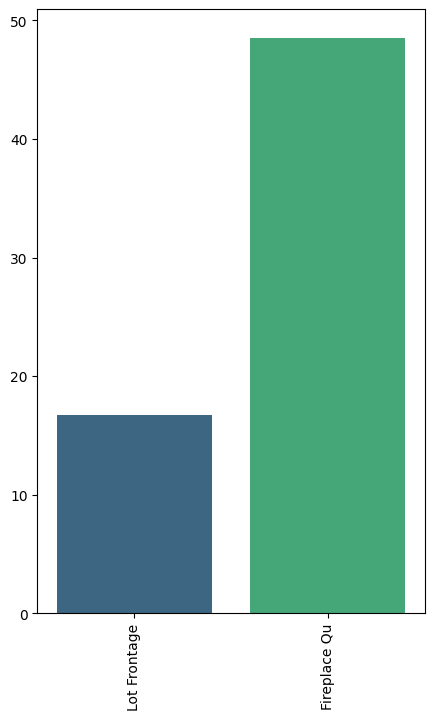

In [52]:
plt.figure(figsize=(5,8),dpi=100)
sns.barplot(x=percent_nan.index,y = percent_nan, palette= 'viridis')
plt.xticks(rotation=90)

In [53]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [54]:
df['Fireplace Qu'].isnull().sum()

1419

In [55]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('No_fireplace')

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

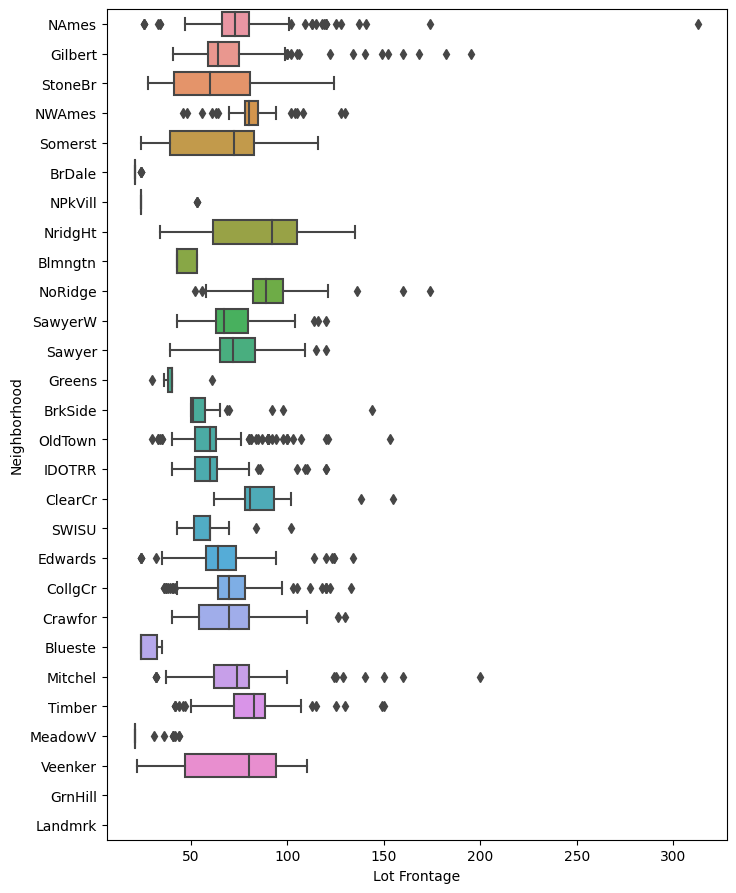

In [56]:
plt.figure(figsize=(8,11), dpi=100)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Lot Config'>

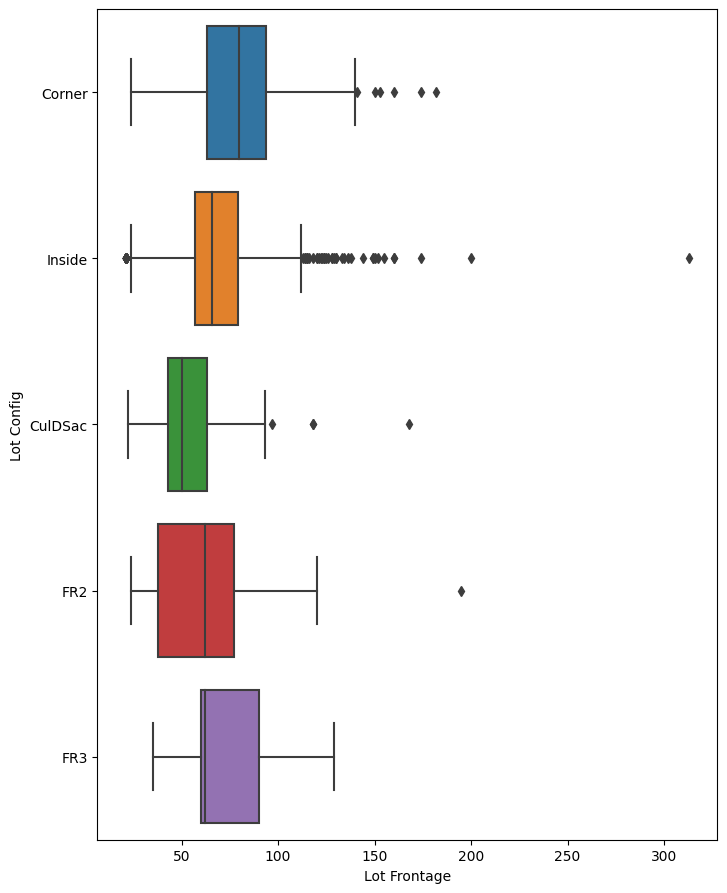

In [57]:
plt.figure(figsize=(8,11), dpi=100)
sns.boxplot(x='Lot Frontage', y='Lot Config', data=df)

In [58]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [59]:
df.groupby('Lot Config')['Lot Frontage'].mean()

Lot Config
Corner     82.123153
CulDSac    56.304348
FR2        61.276923
FR3        77.111111
Inside     67.087003
Name: Lot Frontage, dtype: float64

In [60]:
df['Lot Frontage'] = df.groupby('Lot Config')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))

In [61]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [62]:
# atlast there is no null value 

# Encoding the categorical Value

In [63]:
df['MS SubClass'].dtype

dtype('int64')

In [64]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2924 non-null   object 
 1   MS Zoning        2924 non-null   object 
 2   Lot Frontage     2924 non-null   float64
 3   Lot Area         2924 non-null   int64  
 4   Street           2924 non-null   object 
 5   Lot Shape        2924 non-null   object 
 6   Land Contour     2924 non-null   object 
 7   Utilities        2924 non-null   object 
 8   Lot Config       2924 non-null   object 
 9   Land Slope       2924 non-null   object 
 10  Neighborhood     2924 non-null   object 
 11  Condition 1      2924 non-null   object 
 12  Condition 2      2924 non-null   object 
 13  Bldg Type        2924 non-null   object 
 14  House Style      2924 non-null   object 
 15  Overall Qual     2924 non-null   int64  
 16  Overall Cond     2924 non-null   int64  
 17  Year Built    

In [68]:
object_df = df.select_dtypes(include='object')
object_df.head()

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,No_fireplace,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,No_fireplace,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [69]:
numeric_df = df.select_dtypes(exclude='object') #return all numeric columns
numeric_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.0,31770,6,5,1960,1960,639.0,0.0,441.0,1080.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.0,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.0,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.0,11160,7,5,1968,1968,1065.0,0.0,1045.0,2110.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.0,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,212,34,0,0,0,0,0,3,2010,189900


In [71]:
df_object_dummies = pd.get_dummies(object_df, drop_first = True) #encoded dataframe
df_object_dummies.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [98]:
final_df = pd.concat([numeric_df,df_object_dummies],axis=1)

# modelling

In [99]:
X =final_df.drop('SalePrice', axis=1)
X.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,639.0,0.0,441.0,1080.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,1065.0,0.0,1045.0,2110.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,0,0,0,0,1,0,0,0,1,0


In [100]:
y =final_df['SalePrice']

In [101]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [103]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [107]:
base_elastic_model = ElasticNet(max_iter = 100000) # max_iter used for to overcome the conergence problem with

param_grid = {'alpha': [200,250,300], 'l1_ratio':[0.1, 0.5, 1]}
grid_model = GridSearchCV(base_elastic_model,param_grid,scoring='neg_mean_squared_error', cv=5,verbose=2)
grid_model.fit(scaled_X_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ............................alpha=200, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=200, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=200, l1_ratio=1; total time=   0.3s
[CV] END ..............................alpha=200,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [200, 250, 300], 'l1_ratio': [0.1, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [108]:
grid_model.best_params_

{'alpha': 300, 'l1_ratio': 1}

In [109]:
from sklearn.metrics import mean_squared_error
y_pred = grid_model.predict(scaled_X_test)
mean_squared_error(y_test,y_pred,squared=False)

27122.338410963344

In [93]:
np.mean(y)

180850.35807113544

In [86]:
#percentage of the error
(23821.18675693739/180850.35807113544)*100

13.171766432205567